In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import os
# import sys
# # import random
# from skimage.io import imread, imshow
# from skimage.transform import resize
# from skimage import feature
# from skimage.filters import sobel
# from skimage.morphology import watershed

import skimage
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F
from torch.autograd import Variable

# from pathlib import Path
# import nibabel as nib
# from sklearn import preprocessing
# from skimage import transform
# import cv2

from utils.display_utils import image_grid, image_gray, rebuild
from utils.process_test_img import process_test_img
from utils.prep_test_set import make_test_set
from utils.neuron_dataset import Neuron_dataset
from networks.Unet_no_z_pool import Unet

In [2]:
test_img = process_test_img('data/train-input.tif')#'test-input.tif')
img = test_img.mod_image()

In [3]:
img.shape

(1152, 1152, 102)

In [4]:
test_set = make_test_set(img)

dataset size:  65536


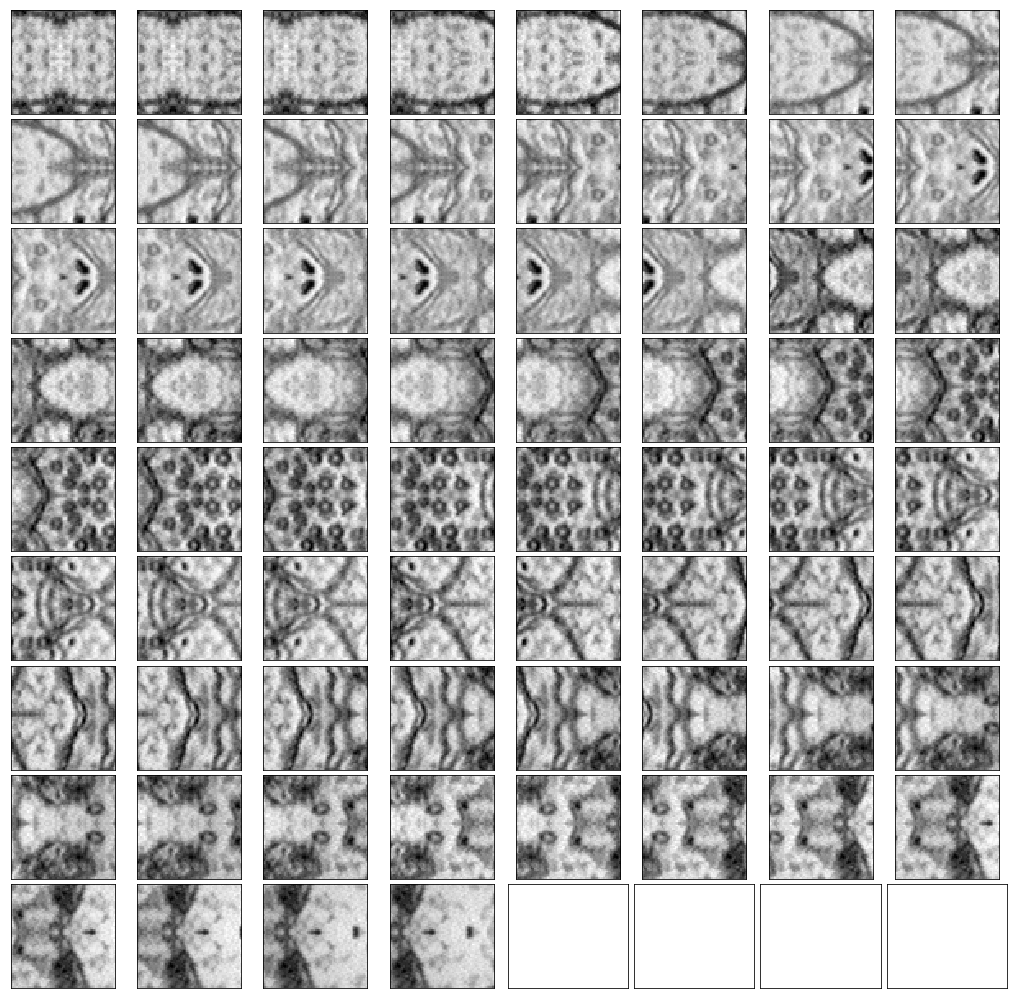

In [5]:
image_grid(test_set[:68])

In [6]:
model = Unet()
state_dict = torch.load('experiments/unet_augs_1.pth')
model.load_state_dict(state_dict)
model.cuda()

Unet(
  (down1): Conv_block(
    (conv1): Sequential(
      (0): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): ReLU()
      (2): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv2): Sequential(
      (0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): ReLU()
      (2): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (down2): Conv_block(
    (conv1): Sequential(
      (0): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): ReLU()
      (2): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv2): Sequential(
      (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): ReLU()
      (2): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (down3): Conv_block(
    (conv1): S

In [7]:
batch_size = 64
neuron_test = Neuron_dataset(test_set,train=False,masks=None, transform=False)
test_loader = torch.utils.data.DataLoader(dataset=neuron_test, 
                                           batch_size=batch_size, 
                                           shuffle=False)

In [8]:
model.eval()
res = []
count =0
for images in test_loader:
    images = Variable(images.cuda())
    outputs = model(images)
    size = outputs.shape[0]
    if size==16:
        for i in range(16):
            res.append(F.sigmoid(outputs)[i].squeeze().data.cpu().numpy())
    else:
        for i in range(64):
            res.append(F.sigmoid(outputs)[i].squeeze().data.cpu().numpy())


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [9]:
len(res)

65536

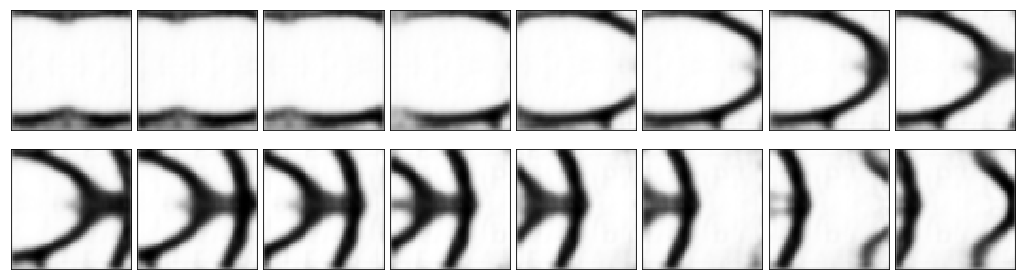

In [10]:
image_grid(res[:18],True,2,8,(18,5))

In [11]:
res_ = rebuild(res)

65536


<Figure size 432x288 with 0 Axes>

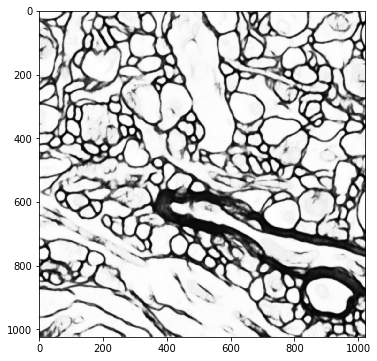

<Figure size 432x288 with 0 Axes>

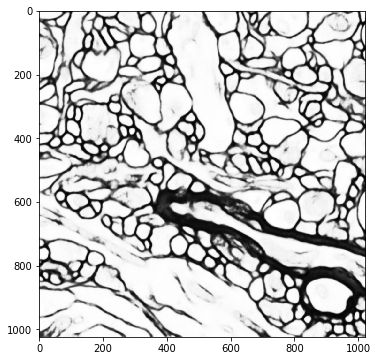

<Figure size 432x288 with 0 Axes>

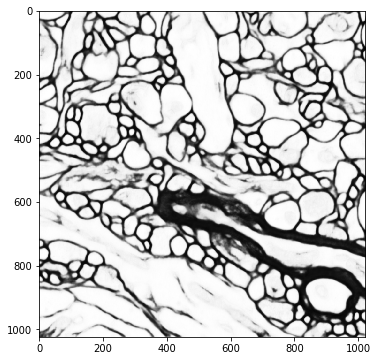

<Figure size 432x288 with 0 Axes>

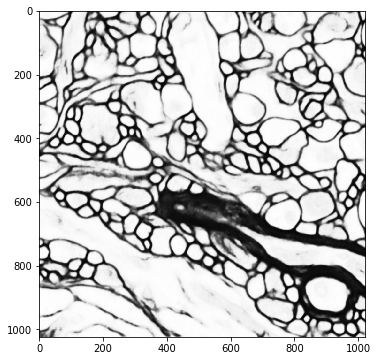

<Figure size 432x288 with 0 Axes>

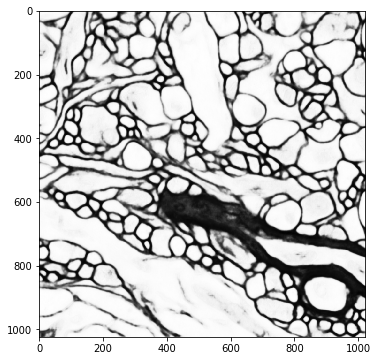

<Figure size 432x288 with 0 Axes>

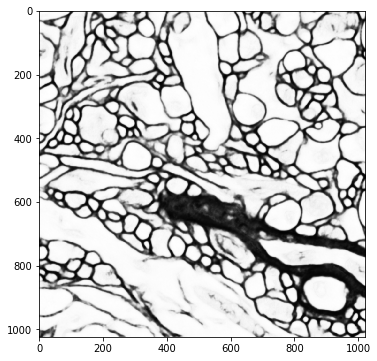

<Figure size 432x288 with 0 Axes>

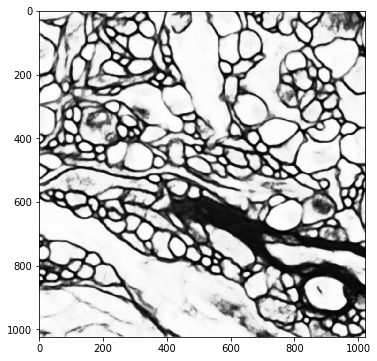

<Figure size 432x288 with 0 Axes>

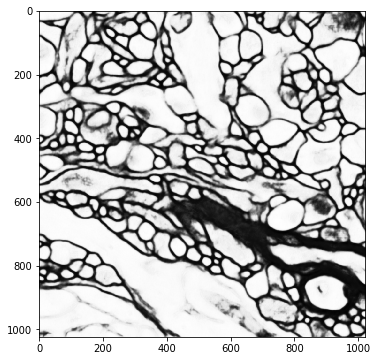

<Figure size 432x288 with 0 Axes>

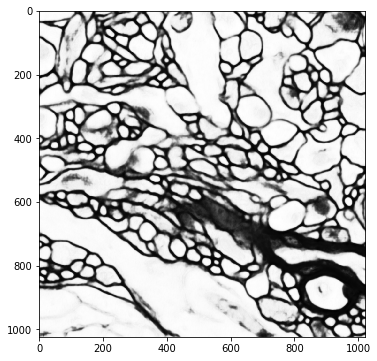

<Figure size 432x288 with 0 Axes>

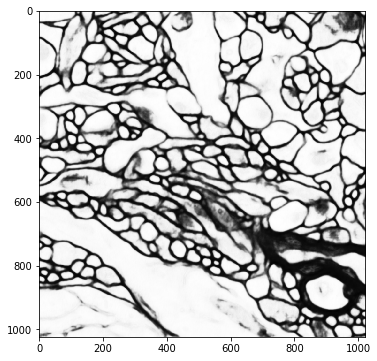

<Figure size 432x288 with 0 Axes>

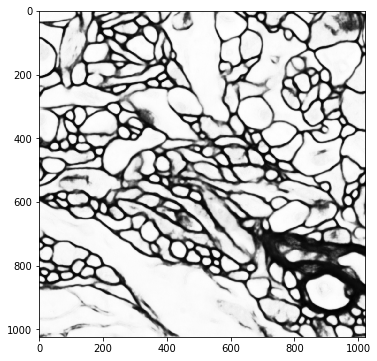

<Figure size 432x288 with 0 Axes>

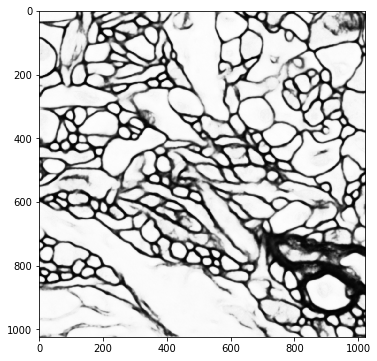

<Figure size 432x288 with 0 Axes>

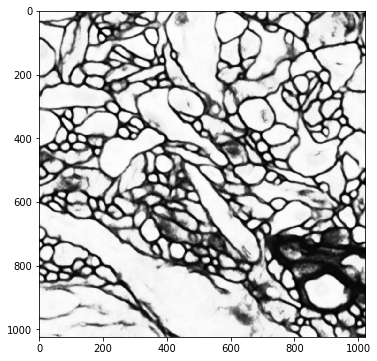

<Figure size 432x288 with 0 Axes>

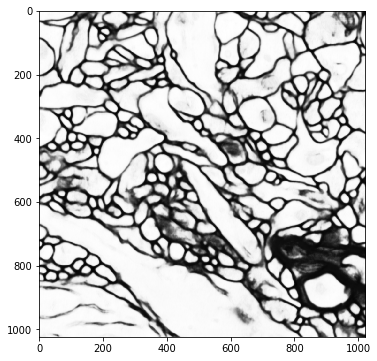

<Figure size 432x288 with 0 Axes>

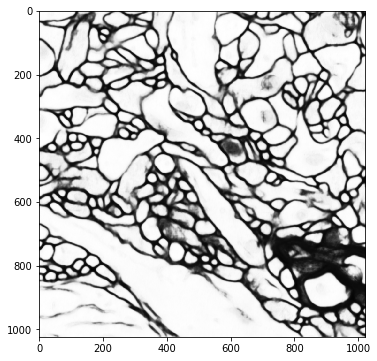

<Figure size 432x288 with 0 Axes>

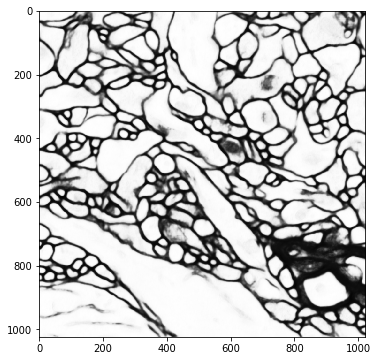

<Figure size 432x288 with 0 Axes>

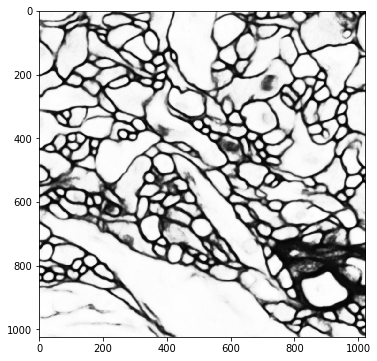

<Figure size 432x288 with 0 Axes>

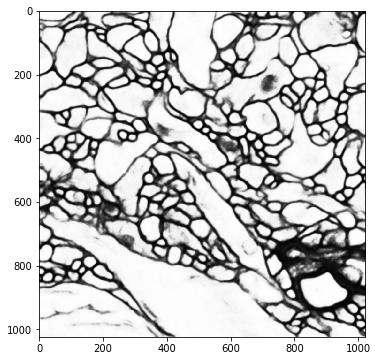

<Figure size 432x288 with 0 Axes>

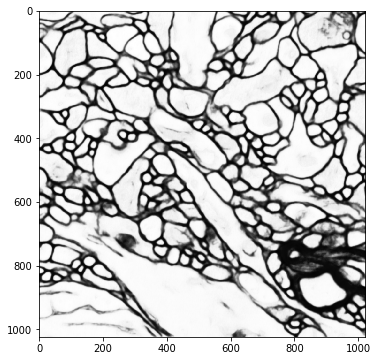

<Figure size 432x288 with 0 Axes>

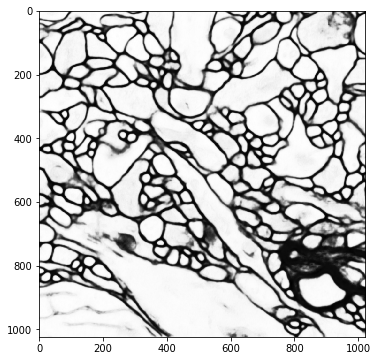

<Figure size 432x288 with 0 Axes>

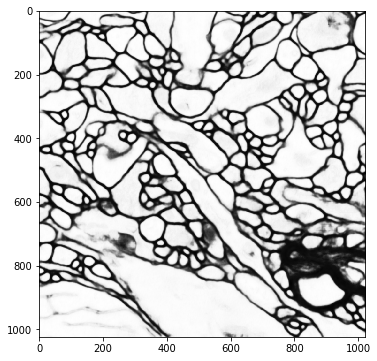

<Figure size 432x288 with 0 Axes>

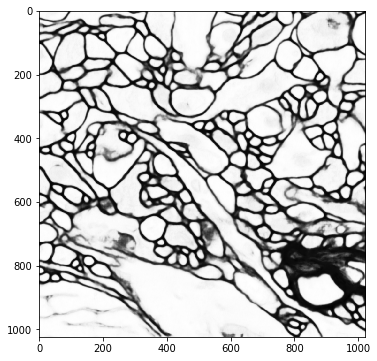

<Figure size 432x288 with 0 Axes>

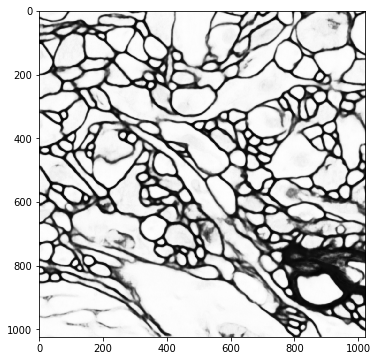

<Figure size 432x288 with 0 Axes>

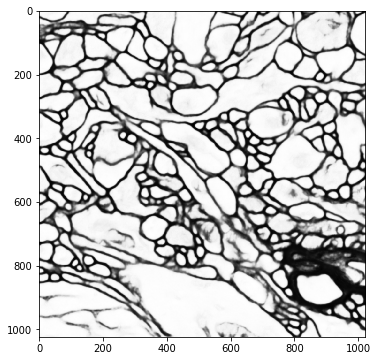

In [12]:
for i in range(24):
    image_gray(res_[:,:,i],6)

<Figure size 432x288 with 0 Axes>

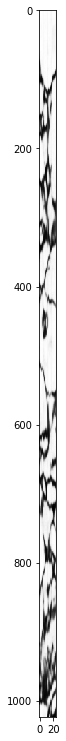

In [20]:
image_gray(res_[0,:,:],13)

<Figure size 432x288 with 0 Axes>

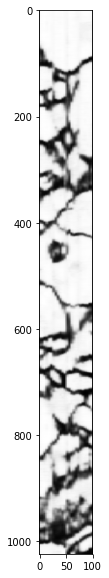

In [22]:
img_a = skimage.transform.resize(res_[0,:,:], (1024,100))
image_gray(img_a)

<Figure size 432x288 with 0 Axes>

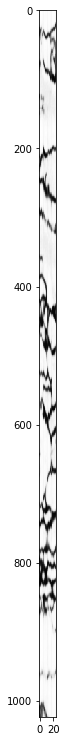

In [23]:
image_gray(res_[:,0,:],13)

<Figure size 432x288 with 0 Axes>

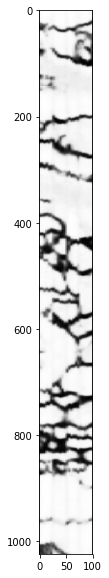

In [24]:
img_a = skimage.transform.resize(res_[:,0,:], (1024,100))
image_gray(img_a)